<a href="https://colab.research.google.com/github/aks2093/US-Police-Shooting-Data-Analysis/blob/master/US_Police_Shooting_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install kmodes

**Import necessary libraries and data**

In [23]:
import pandas as pd
import os
import plotly.express as px
from kmodes.kmodes import KModes
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = "/content/drive/My Drive/USPoliceShootingData"
data = pd.read_csv(os.path.join(data_dir, "shootings.csv"))
data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

In [24]:
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [26]:
print(data.__len__())
print(data["id"].unique().__len__())
print(data["name"].unique().__len__())
print(data["date"].unique().__len__())

data.describe()

4895
4895
4851
1792


,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [27]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


**Lets Analyze the association among some categorical variable pairs**

1. "race" and "signs_of_mental_illness"

Index([False, True], dtype='object', name='signs_of_mental_illness')
Index(['Asian', 'Black', 'Hispanic', 'Native', 'Other', 'White'], dtype='object', name='race')


signs_of_mental_illness  False  True 
race                                 
Asian                       69     24
Black                     1114    184
Hispanic                   745    157
Native                      64     14
Other                       37     11
White                     1763    713


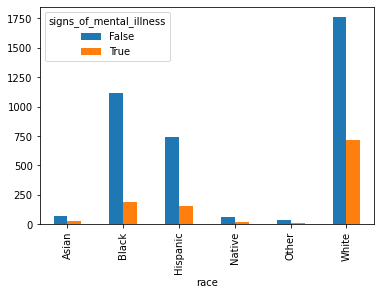

In [33]:
crosstab1 = pd.crosstab(data["race"], data["signs_of_mental_illness"])
print(crosstab1.columns)
print(crosstab1.index)
print("\n")
print(crosstab1)

crosstab1.plot.bar(stacked=False)
plt.legend(title='signs_of_mental_illness')
plt.show()


2. "signs_of_mental_illness" and "threat_level"

In [34]:
pd.crosstab(data["signs_of_mental_illness"], data["threat_level"])

threat_level,attack,other,undetermined
signs_of_mental_illness,,,
False,2494,1124,174
True,666,404,33


3. "arms_category" and "race"

In [32]:
pd.crosstab(data["arms_category"], data["race"])

race,Asian,Black,Hispanic,Native,Other,White
arms_category,,,,,,
Blunt instruments,5,20,30,2,0,65
Electrical devices,0,9,4,1,0,10
Explosives,1,0,1,0,0,2
Guns,35,766,448,41,19,1455
Hand tools,0,1,0,0,0,0
Multiple,3,11,13,0,2,25
Other unusual objects,2,43,40,1,0,106
Piercing objects,1,4,8,1,1,14
Sharp objects,31,170,189,19,14,395


4. "body_camera" and "race"

In [31]:
pd.crosstab(data["body_camera"], data["race"])

race,Asian,Black,Hispanic,Native,Other,White
body_camera,,,,,,
False,77,1094,796,66,42,2242
True,16,204,106,12,6,234


5. "race" and "flee"

In [35]:
pd.crosstab(data["race"], data["flee"])

flee,Car,Foot,Not fleeing,Other
race,,,,
Asian,6,11,71,5
Black,218,255,734,91
Hispanic,159,124,534,85
Native,9,16,47,6
Other,10,5,30,3
White,418,231,1657,170


Lets extract month and year from "date" variable and add two extra variable "month" and "year" to analyze  the count of shot people monthly and yearly 

In [36]:
data["manner_of_death"].unique()
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
print(data["year"].unique())
print(data["month"].unique())
print(data.columns)
print(data.columns.__len__())

[2015 2016 2017 2018 2019 2020]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category', 'year', 'month'],
      dtype='object')
17


month  mapping: 
{"1": Jan,
"2": Feb,
"3": March,
"4": April,
"5": May,
"6": June,
"7": July,
"8": August,
"9": September,
"10": October,
"11": November,
"12": December
}

**Analyzing the count of shot people monthly with pie chart**

In [61]:
print(data.groupby(["month"])["id"].count())
month_wise_values = data.groupby(["month"])["id"].count().values.tolist()
month_df = pd.DataFrame({"month":data.month.unique().tolist(), "count": month_wise_values})

print(month_wise_values)
fig = px.pie(month_df, values="count",  names='month')
fig.show()


month
1     505
2     462
3     503
4     430
5     418
6     399
7     413
8     371
9     328
10    367
11    354
12    345
Name: id, dtype: int64
[505, 462, 503, 430, 418, 399, 413, 371, 328, 367, 354, 345]


**Analyzing the count of shot people yearly with pie chart**

In [60]:
print(data.groupby(["year"])["id"].count())
year_wise_values = data.groupby(["year"])["id"].count().values.tolist()
year_df = pd.DataFrame({"year":data.year.unique().tolist(), "count": year_wise_values})

print(year_wise_values)
fig = px.pie(year_df, values="count",  names='year')
fig.show()

year
2015    965
2016    904
2017    906
2018    888
2019    858
2020    374
Name: id, dtype: int64
[965, 904, 906, 888, 858, 374]


**Do crosstab between "year" and "month"**

In [43]:
pd.crosstab(data["year"], data["month"], margins=True)

month,1,2,3,4,5,6,7,8,9,10,11,12,All
year,,,,,,,,,,,,,
2015,75,77,91,83,69,63,100,91,80,78,76,82,965
2016,80,85,90,73,69,87,71,77,73,71,68,60,904
2017,91,97,74,65,68,80,91,78,66,81,76,39,906
2018,96,74,99,88,70,70,82,68,50,64,63,64,888
2019,81,68,76,63,64,77,69,57,59,73,71,100,858
2020,82,61,73,58,78,22,0,0,0,0,0,0,374
All,505,462,503,430,418,399,413,371,328,367,354,345,4895


**Make pairs of cetgorical variables  to check their pairwise dependence**

>H0: Two variables in a pair are independent(No association)

>Ha: Two variables in a pair are dependent(associated)

1. if p<0.005 then Dependent (reject H0)
2. if p>0.005 then Independent(fail to reject H0)

In [62]:
process_data = data.copy()
columns = ['manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category', 'year', 'month']
process_data = process_data[data["age"]<=73]

process_data['age_bin'] = pd.cut(process_data['age'], [0, 20, 40, 50, 60, 73], labels=['0-20', '20-40','40-50','50-60','60-73'])
variable_pairs = []
for i in range(len(columns)):
    for j in range(i, len(columns)):
        variable_pairs.append((columns[i], columns[j]))

dependent_variables = []
for pair in variable_pairs:
    column1 = pair[0]
    column2 = pair[1]

    obs = pd.crosstab(process_data[column1], process_data[column2])
    if np.all(obs>5):
        stat, p, dof, expected = chi2_contingency(obs)
        if p<=0.005:
            dependent_variables.append((column1, column2))
            print("Processing columns: {} , {}".format(column1, column2))
            print("p-value: {}".format(p))
            print(obs)
            print("\n")
            print("\n")
print(dependent_variables)


Processing columns: manner_of_death , signs_of_mental_illness
p-value: 0.0003371202574857988
signs_of_mental_illness  False  True 
manner_of_death                      
shot                      3600   1015
shot and Tasered           168     79




Processing columns: manner_of_death , flee
p-value: 0.000234264014063619
flee              Car  Foot  Not fleeing  Other
manner_of_death                                
shot              801   613         2862    339
shot and Tasered   18    29          181     19




Processing columns: manner_of_death , year
p-value: 0.002125062532509508
year              2015  2016  2017  2018  2019  2020
manner_of_death                                     
shot               892   845   851   852   820   355
shot and Tasered    67    54    49    29    31    17




Processing columns: manner_of_death , month
p-value: 0.001047074878710317
month              1    2    3    4    5    6    7    8    9    10   11   12
manner_of_death                           

**As we can see from above result that the following pairs have some association(dependence) among them**

[('manner_of_death', 'signs_of_mental_illness'), ('manner_of_death', 'flee'), ('manner_of_death', 'year'), ('manner_of_death', 'month'), ('gender', 'signs_of_mental_illness'), ('gender', 'flee'), ('race', 'signs_of_mental_illness'), ('race', 'body_camera'), ('signs_of_mental_illness', 'threat_level'), ('signs_of_mental_illness', 'flee'), ('signs_of_mental_illness', 'body_camera'), ('signs_of_mental_illness', 'year'), ('threat_level', 'flee'), ('threat_level', 'year'), ('threat_level', 'month'), ('flee', 'body_camera'), ('flee', 'year'), ('body_camera', 'year')]

**Analyzing the "age" variable with box plot**

In [63]:
fig = px.box(data, y="age")
fig.show()

So if age>73 then it can be considered as outliers and there are only 37 data points where age>37, so we can drop them

**Prepare data for clustering**

In [67]:
cluster_data = data[data["age"]<=73]
cluster_data.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category', 'year', 'month'],
      dtype='object')

**Do binning on the age variable**

a. Before binning the "age" distribution

In [69]:
fig = px.histogram(cluster_data, x="age")
fig.show()

b. After binning "age" distribution

In [71]:
cluster_data['age_bin'] = pd.cut(cluster_data['age'], [0, 20, 40, 50, 60, 73], labels=['0-20', '20-40','40-50','50-60','60-73'])

fig = px.histogram(cluster_data, x="age_bin")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data preparation for K-Mode clustering

In [72]:
cluster_data = cluster_data.drop(columns=["id",	"name",	"date", "age","city"], axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cluster_data = cluster_data.apply(le.fit_transform)
cluster_data.head()

,manner_of_death,armed,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,age_bin
0,0,35,1,0,47,1,0,2,0,3,0,0,3
1,0,35,1,5,37,0,0,2,0,3,0,0,2
2,1,81,1,2,16,0,1,2,0,9,0,0,1
3,0,80,1,5,4,1,0,2,0,6,0,0,1
4,0,59,1,2,5,0,0,2,0,7,0,0,1


Apply K-Modes clustering

In [101]:
number_of_clusers = 10
cost = []
for num_clusters in list(range(1,number_of_clusers)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

x_axis = np.array([i for i in range(1,number_of_clusers,1)])

fig = px.line(x=x_axis, y=cost)
fig.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 28500.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 488, cost: 25492.0
Run 1, iteration: 2/100, moves: 15, cost: 25492.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 402, cost: 24173.0
Run 1, iteration: 2/100, moves: 6, cost: 24173.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 615, cost: 23264.0
Run 1, iteration: 2/100, moves: 16, cost: 23264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 601, cost: 22757.0
Run 1, iteration: 2/100, moves: 18, cost: 22756.0
Run 1, iteration: 3/100, moves: 2, cost: 22756.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1

In [99]:
num_clusters = 5
kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
arr = kmode.fit_predict(cluster_data)
cluster_data["cluster"] = arr
cluster_data.columns

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 690, cost: 23153.0
Run 1, iteration: 2/100, moves: 86, cost: 23153.0


Index(['manner_of_death', 'armed', 'gender', 'race', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'arms_category', 'year', 'month', 'age_bin', 'cluster'],
      dtype='object')

Let's analyze each variable against cluster

In [100]:
columns = ['manner_of_death', 'armed', 'gender', 'race', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera',
       'arms_category', 'year', 'month', 'age_bin']
       
target = "cluster"

dependent_variables = []
for column in columns:

    obs = pd.crosstab(cluster_data[column], cluster_data[target])
    if np.all(obs>5):
        stat, p, dof, expected = chi2_contingency(obs)
        if p<=0.005:
            dependent_variables.append(column)
            print("Processing columns: {} , {}".format(column, target))
            print("p-value: {}".format(p))
            print(obs)
            print("\n")
            print("\n")

print(dependent_variables)

Processing columns: manner_of_death , cluster
p-value: 2.13559529254258e-24
cluster             0    1    2    3    4
manner_of_death                          
0                2970  681  443  349  172
1                 103   85   14   16   29




Processing columns: signs_of_mental_illness , cluster
p-value: 1.4911275763977505e-187
cluster                     0    1    2    3    4
signs_of_mental_illness                          
0                        2596  569  429  105   69
1                         477  197   28  260  132




Processing columns: threat_level , cluster
p-value: 0.0
cluster          0    1    2    3    4
threat_level                          
0             2624  126  114  112  157
1              375  616  255  239   37
2               74   24   88   14    7




Processing columns: flee , cluster
p-value: 2.964557707730671e-175
cluster     0    1    2    3    4
flee                             
0         449   43  280   32   15
1         480   81   36   24   21
2  

So it can be seen the variables ['manner_of_death', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera', 'year', 'month', 'age_bin'] are the prominent features that are playing important role in pattern being captured in the clusters. 